Tentatives de méthodes avancées d'interpolation/impainting des signaux:

- idée 1 :
Quand on connait la figure : utilisation des connaissances apriori pour reeffectuer une interpolation (pas linéaire) + enleve le bruit
Méthode : résolution du problème inverse avec redularisation de Tikonove :

$$  min ||y − x||^2 + \mu ||x\_ref − x||^2 + \lambda ||x||^2 , x \in R^N $$

Solution : 
$$  x = \frac{\mu x\_ref + y}{1 + \lambda + \mu}$$



In [1]:
import os
import sys

print(sys.path)
if '\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\' not in sys.path:
    sys.path.append('\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\')
    print("ok")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import movuinos.SkateboardXXX3000DataSet as sk
import tools.display_functions as df
import tools.signal_analysis as sa
import tools.integratino_functions as ifct
import tools.correction_interpolation as ci

import models.detection.detection_energy as dt
import models.classification.reference_tricks_classification as rtc

from pathlib import Path

from tools.quaternion import Quaternion #, get_euler_angles, get_rot_mat

['c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\study', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\python37.zip', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\DLLs', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler', '', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\win32', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\Pythonwin', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Pierre\\.ipython']
ok


In [2]:
trick_name="ollie"
tricks_path = f"../../../06_Data/Isolated_Tricks/{trick_name}/{trick_name}_success_10.csv"
trick_ref_path = f"../../../06_Data/Reference_tricks/{trick_name}_reference.csv"

for p in Path(tricks_path).parent.glob(pattern="*"):
    print(p)
print(Path(tricks_path).exists())

#--- Opening file ---
trick = sk.SkateboardXXX3000DataSet(tricks_path)
trick_ref = sk.SkateboardXXX3000DataSet(trick_ref_path)

..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_10.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_12.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_13.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_14.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_16.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_18.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_2.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_4.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_5.csv
..\..\..\06_Data\Isolated_Tricks\ollie\ollie_success_9.csv
True
Reading : ../../../06_Data/Isolated_Tricks/ollie/ollie_success_10.csv
Reading : ../../../06_Data/Reference_tricks/ollie_reference.csv


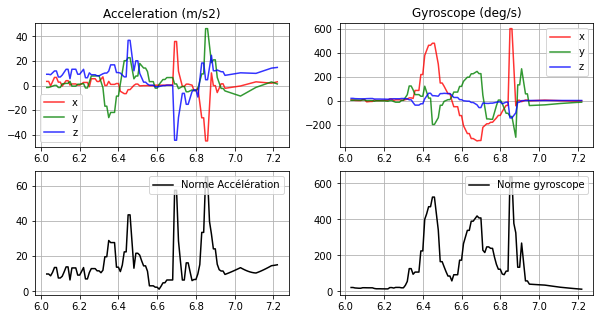

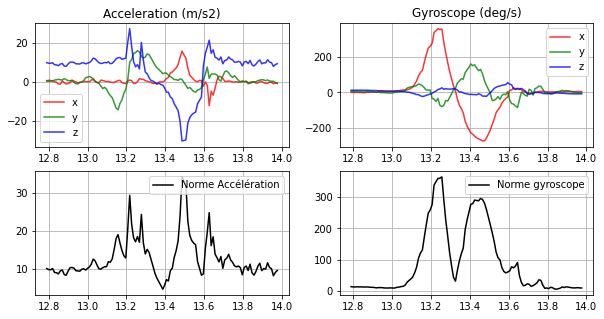

120
120


In [3]:
plt.figure(figsize=(10,5))
trick.dispRawData()

plt.figure(figsize=(10,5))
trick_ref.dispRawData()

print(trick.nb_row)
print(trick_ref.nb_row)

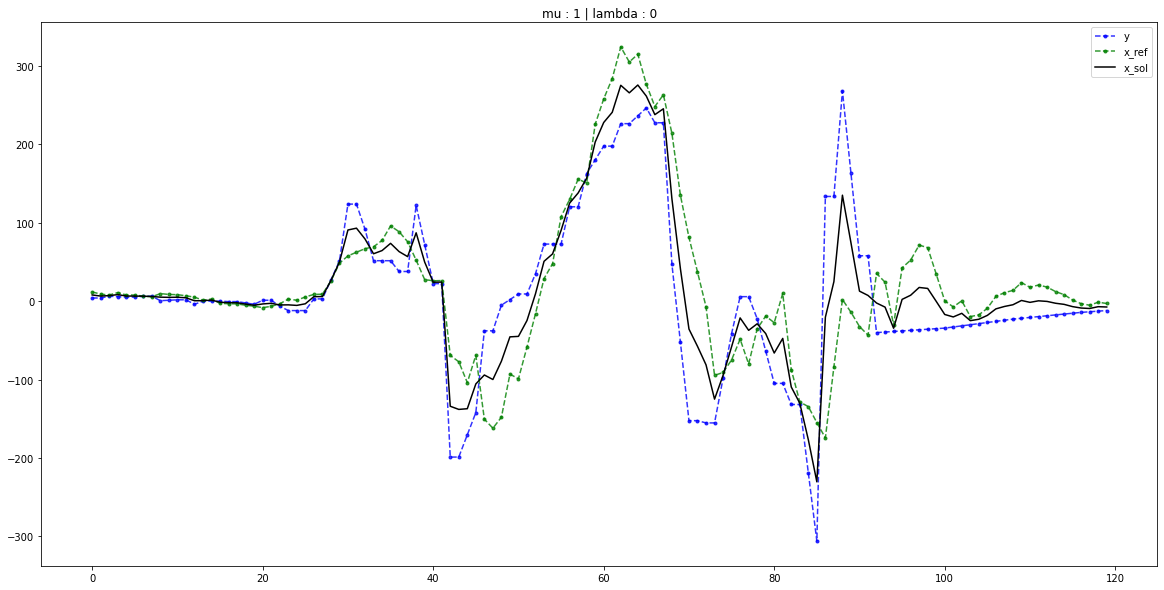

In [4]:
mu = 1
lamb = 0
lamb_l1 = 0
# lamb_l1 = 0

gx_raw = trick.rawData["gy"]*180/np.pi
gx_ref_raw = trick_ref.rawData["gy"]*180/np.pi

norm_raw = np.linalg.norm(gx_raw)
norm_ref_raw = np.linalg.norm(gx_ref_raw)

gx_ref_raw = gx_ref_raw/norm_ref_raw*norm_raw

gx_interp = (gx_raw + mu*gx_ref_raw)/(1+lamb+mu)-lamb_l1

plt.figure(figsize=(20,10))
plt.plot(gx_raw, "--b",marker="o",markersize=3 ,label="y",alpha=0.8)
plt.plot(gx_ref_raw, "--g",marker="o",markersize=3,label="x_ref",alpha=0.8)
plt.plot(gx_interp, color="black",label="x_sol")
plt.title(f"mu : {mu} | lambda : {lamb}")
plt.legend(
)
plt.show()

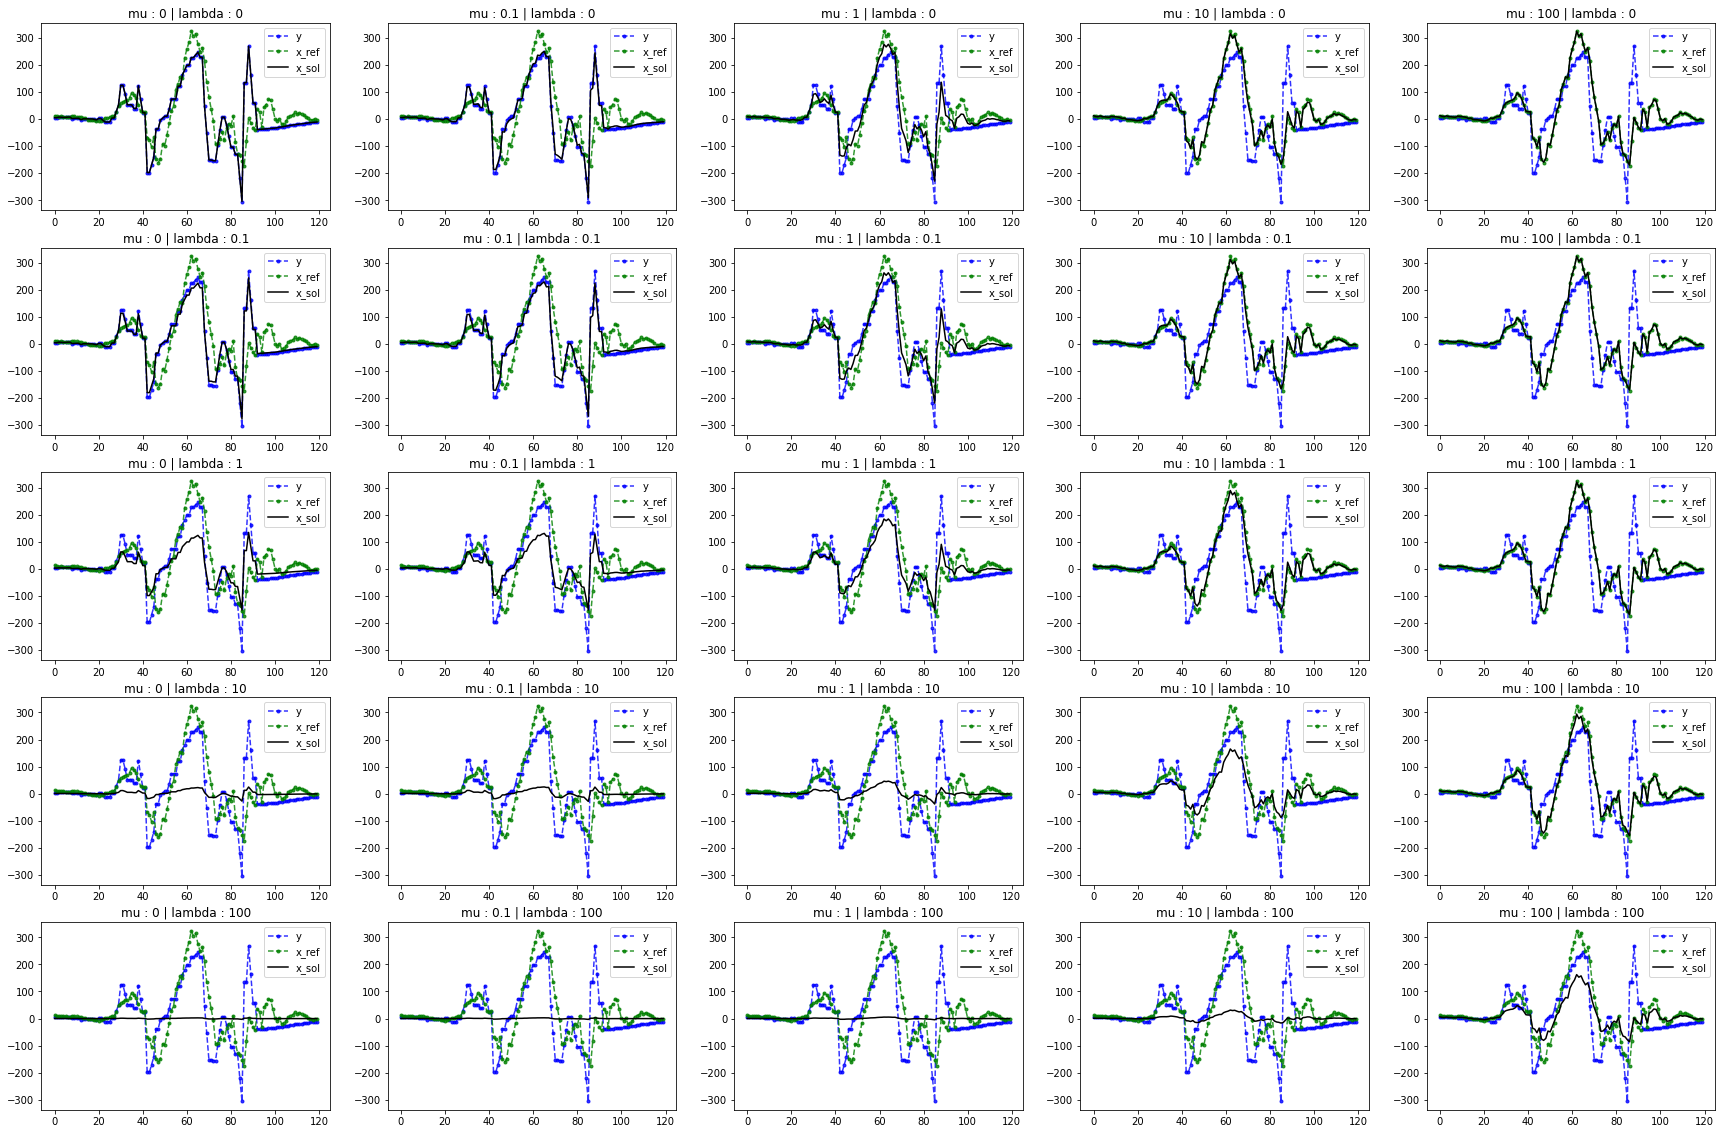

In [5]:
mu = 1
lamb = 0
lamb_l1 = 0
# lamb_l1 = 0

mu_list=[0,0.1,0.3,0.5,1,3,5,10,100]
lamb_list=[0,0.1,0.3,0.5,1,3,5,10,100]

mu_list=[0,0.1,1,10,100]
lamb_list=[0,0.1,1,10,100]


mu_len=len(mu_list)
lamb_len=len(lamb_list)

gx_raw = trick.rawData["gy"]*180/np.pi
gx_ref_raw = trick_ref.rawData["gy"]*180/np.pi

norm_raw = np.linalg.norm(gx_raw)
norm_ref_raw = np.linalg.norm(gx_ref_raw)

gx_ref_raw = gx_ref_raw/norm_ref_raw*norm_raw

plt.figure(figsize=(30,20))
for i,mu in enumerate(mu_list):
    for j,lamb in enumerate(lamb_list):
        gx_interp = (gx_raw + mu*gx_ref_raw)/(1+lamb+mu)-lamb_l1

        plt.subplot(mu_len,lamb_len,1+ i+j*lamb_len)
        plt.plot(gx_raw, "--b",marker="o",markersize=3 ,label="y",alpha=0.8)
        plt.plot(gx_ref_raw, "--g",marker="o",markersize=3,label="x_ref",alpha=0.8)
        plt.plot(gx_interp, color="black",label="x_sol")
        plt.title(f"mu : {mu} | lambda : {lamb}")
        plt.legend(
        )
plt.show()